--- Average Profit/Loss by Market Sentiment ---
classification
Extreme Fear           NaN
Fear             50.047622
Neutral          22.229713
Greed            87.894859
Extreme Greed    25.418772
Name: closed_pnl, dtype: float64


Generated bar chart: pnl_by_sentiment_bar.png
Generated box plot: pnl_distribution_boxplot.png
Generated time series plot: fear_greed_timeseries.png
Generated histogram: pnl_histogram.png


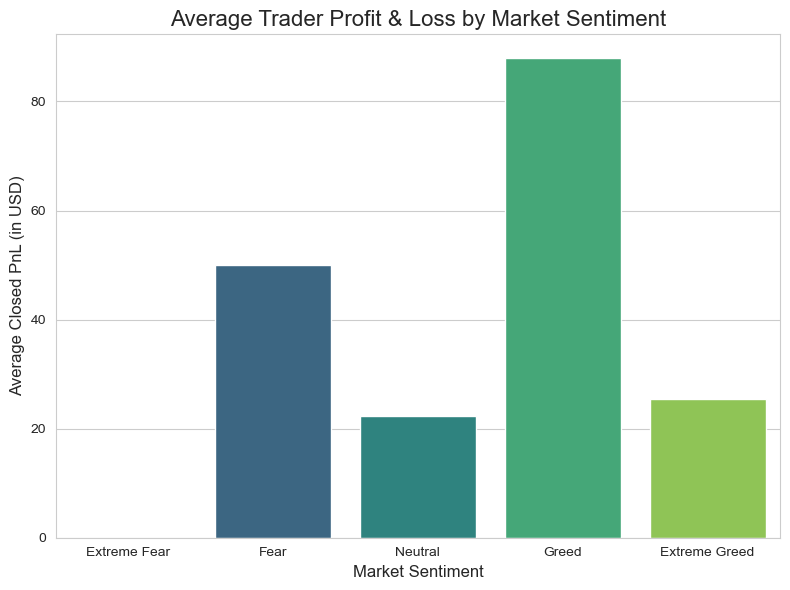

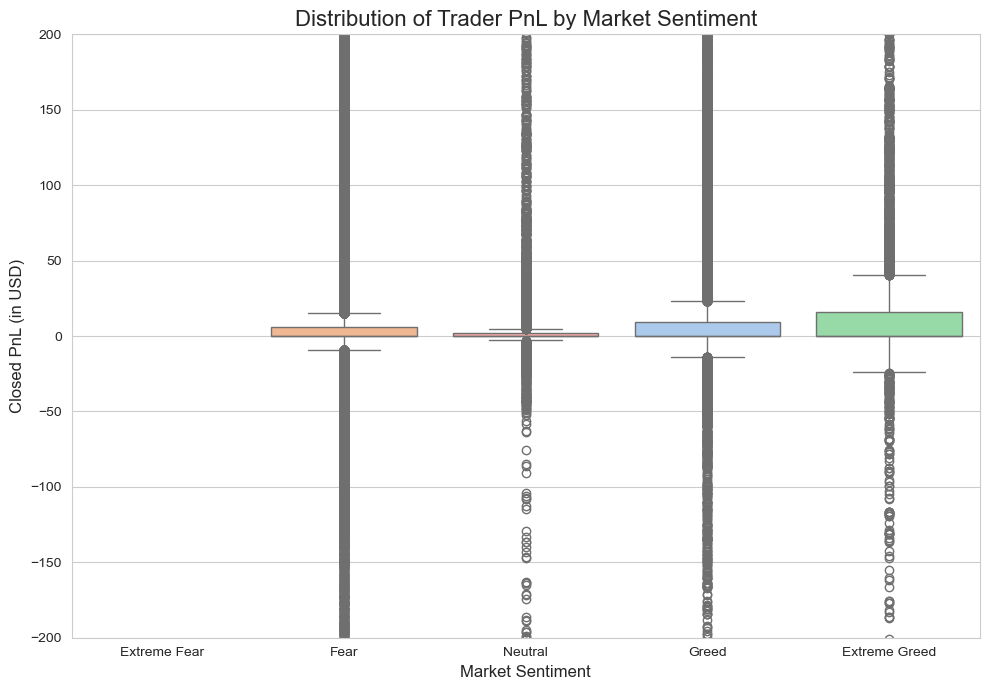

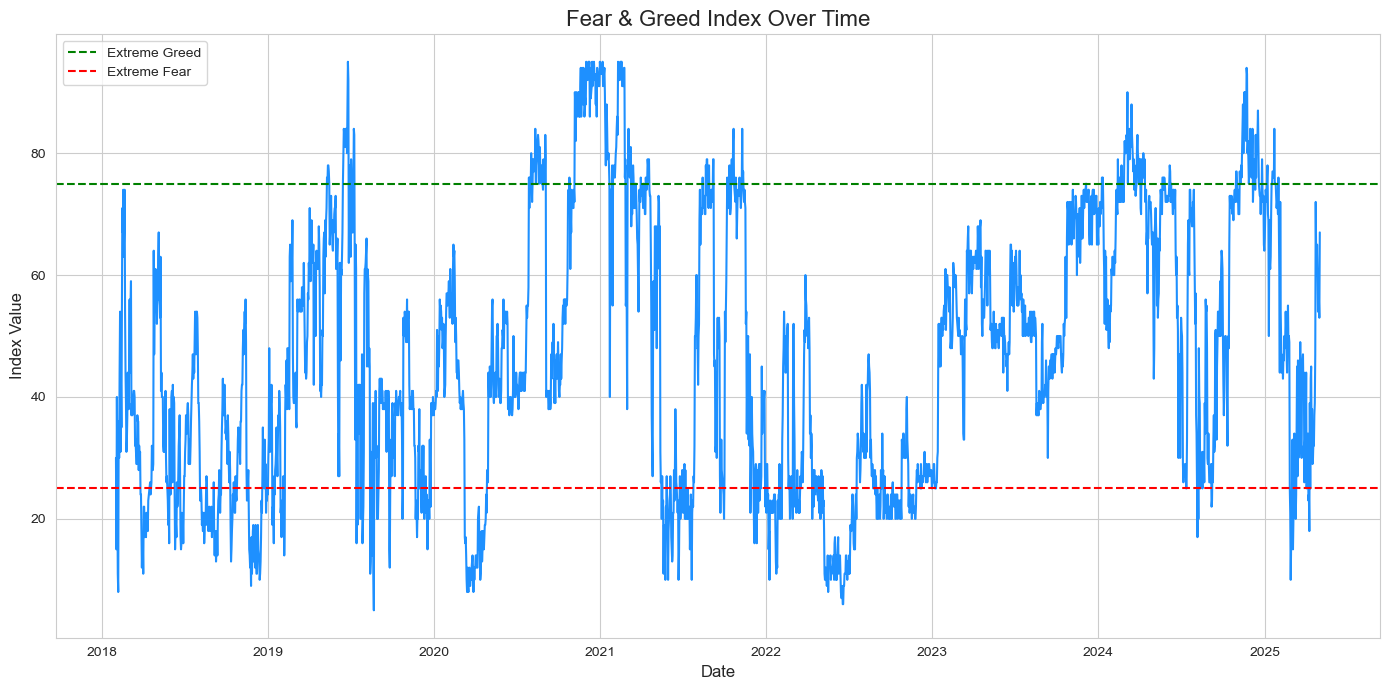

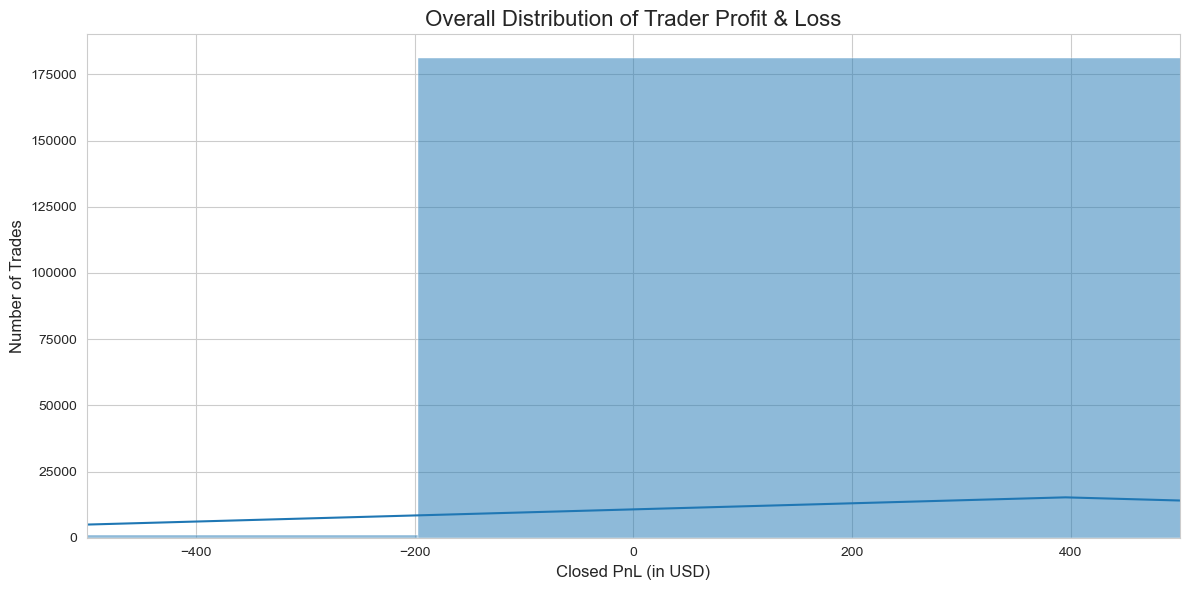

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

trader_df = pd.read_csv('historical_data.csv')
sentiment_df = pd.read_csv('fear_greed_index.csv')

trader_df.columns = trader_df.columns.str.lower().str.replace(' ', '_')
sentiment_df.columns = sentiment_df.columns.str.lower().str.replace(' ', '_')

trader_df['timestamp'] = pd.to_datetime(trader_df['timestamp'], unit='ms')
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])

trader_df['date_only'] = trader_df['timestamp'].dt.date
trader_df['date_only'] = pd.to_datetime(trader_df['date_only'])

merged_df = pd.merge(trader_df, sentiment_df, left_on='date_only', right_on='date', how='left')

merged_df.dropna(subset=['classification'], inplace=True)


sentiment_order = ['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed']
average_pnl_by_sentiment = merged_df.groupby('classification')['closed_pnl'].mean().reindex(sentiment_order)


print("--- Average Profit/Loss by Market Sentiment ---")
print(average_pnl_by_sentiment)
print("\n")

sns.set_style("whitegrid")

plt.figure(figsize=(8, 6))
sns.barplot(x=average_pnl_by_sentiment.index, y=average_pnl_by_sentiment.values, palette='viridis', order=sentiment_order, hue=average_pnl_by_sentiment.index, legend=False)
plt.title('Average Trader Profit & Loss by Market Sentiment', fontsize=16)
plt.xlabel('Market Sentiment', fontsize=12)
plt.ylabel('Average Closed PnL (in USD)', fontsize=12)
plt.tight_layout()
plt.savefig("pnl_by_sentiment_bar.png")
print("Generated bar chart: pnl_by_sentiment_bar.png")


plt.figure(figsize=(10, 7))
sns.boxplot(x='classification', y='closed_pnl', data=merged_df, palette='pastel', order=sentiment_order, hue='classification', legend=False)
plt.ylim(-200, 200) # Adjusted y-axis for better visibility of the main distribution
plt.title('Distribution of Trader PnL by Market Sentiment', fontsize=16)
plt.xlabel('Market Sentiment', fontsize=12)
plt.ylabel('Closed PnL (in USD)', fontsize=12)
plt.tight_layout()
plt.savefig("pnl_distribution_boxplot.png")
print("Generated box plot: pnl_distribution_boxplot.png")


sentiment_df_sorted = sentiment_df.sort_values('date')
plt.figure(figsize=(14, 7))
plt.plot(sentiment_df_sorted['date'], sentiment_df_sorted['value'], color='dodgerblue')
plt.title('Fear & Greed Index Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Index Value', fontsize=12)
plt.axhline(75, color='green', linestyle='--', label='Extreme Greed')
plt.axhline(25, color='red', linestyle='--', label='Extreme Fear')
plt.legend()
plt.tight_layout()
plt.savefig("fear_greed_timeseries.png")
print("Generated time series plot: fear_greed_timeseries.png")


plt.figure(figsize=(12, 6))
sns.histplot(merged_df['closed_pnl'], bins=200, kde=True)
plt.title('Overall Distribution of Trader Profit & Loss', fontsize=16)
plt.xlabel('Closed PnL (in USD)', fontsize=12)
plt.ylabel('Number of Trades', fontsize=12)
plt.xlim(-500, 500) # Adjusted x-axis for better visibility
plt.tight_layout()
plt.savefig("pnl_histogram.png")
print("Generated histogram: pnl_histogram.png")